# Heart Disease Neural Network Classifier

The data of this project comes from Kaggle.com(https://www.kaggle.com/ronitf/heart-disease-uci/kernels).
The originl data is from UCI's Macine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

With data of heart diease patient, we can build a neural network model and train the model with training set to make precise predictions.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt

First we use pandas.read_csv() to read the data, check the size and take a glance. The data is not very large so a complex neural network is very likely to overfit. To reach a higher accuracy and F-score we need to choose architecture carefully.

In [2]:
data = pd.read_csv('data/heart.csv')

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

According to the information of data, most of variables are catagorial. We will then process those features with pd.get_dummies().

In [6]:
catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object')

In [7]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object

In [8]:
data = pd.get_dummies(data, drop_first=True)

In [9]:
data.head()

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,2,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,2,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


We will normalize the input features to avoid any one feature to dominate the training of neural network.
The factor we use in normalization will be kept to make predictions.

In [10]:
y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Since the dataset is not large, we will not use cross-validation set to let neural network model have enough data to train.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In keras, It is quite convenient to setup a neural network model.We will set 21 neurons as input layer, 12 neurons in the hidden layer and an output layer.

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=21, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
output = model.fit(x_train, y_train, epochs=500, batch_size=x_train.shape[0])

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
242/242 [==============================] - 0s 660us/sample - loss: 0.7191 - acc: 0.5413
Epoch 2/500
242/242 [==============================] - 0s 4us/sample - loss: 0.7174 - acc: 0.5413
Epoch 3/500
242/242 [==============================] - 0s 8us/sample - loss: 0.7157 - acc: 0.5413
Epoch 4/500
242/242 [==============================] - 0s 7us/sample - loss: 0.7141 - acc: 0.5413
Epoch 5/500
242/242 [==============================] - 0s 4us/sample - loss: 0.7125 - acc: 0.5413
Epoch 6/500
242/242 [==============================] - 0s 6us/sample - loss: 0.7109 - acc: 0.5413
Epoch 7/500
242/242 [==============================] - 0s 8us/sample - loss: 0.7094 - acc: 0.5413
Epoch 8/500
242/242 [==============================] - 0s 4us/sample - loss: 0.7079 - acc: 0.5413
Epoch 9/500
242/242 [==============================] - 0s 4us/sample - loss: 0.7065 - acc: 0.5413
Epoch 10/500
242/242 [==============================] - 0s 6us/sampl

Epoch 82/500
242/242 [==============================] - 0s 5us/sample - loss: 0.6416 - acc: 0.6529
Epoch 83/500
242/242 [==============================] - 0s 4us/sample - loss: 0.6409 - acc: 0.6529
Epoch 84/500
242/242 [==============================] - 0s 4us/sample - loss: 0.6401 - acc: 0.6529
Epoch 85/500
242/242 [==============================] - 0s 8us/sample - loss: 0.6394 - acc: 0.6570
Epoch 86/500
242/242 [==============================] - 0s 1us/sample - loss: 0.6386 - acc: 0.6612
Epoch 87/500
242/242 [==============================] - 0s 4us/sample - loss: 0.6378 - acc: 0.6612
Epoch 88/500
242/242 [==============================] - 0s 8us/sample - loss: 0.6371 - acc: 0.6612
Epoch 89/500
242/242 [==============================] - 0s 4us/sample - loss: 0.6363 - acc: 0.6653
Epoch 90/500
242/242 [==============================] - 0s 12us/sample - loss: 0.6356 - acc: 0.6653
Epoch 91/500
242/242 [==============================] - 0s 14us/sample - loss: 0.6348 - acc: 0.6653
Epoch 92

Epoch 165/500
242/242 [==============================] - 0s 7us/sample - loss: 0.5736 - acc: 0.8140
Epoch 166/500
242/242 [==============================] - 0s 4us/sample - loss: 0.5727 - acc: 0.8140
Epoch 167/500
242/242 [==============================] - 0s 2us/sample - loss: 0.5719 - acc: 0.8182
Epoch 168/500
242/242 [==============================] - 0s 8us/sample - loss: 0.5710 - acc: 0.8182
Epoch 169/500
242/242 [==============================] - 0s 8us/sample - loss: 0.5701 - acc: 0.8182
Epoch 170/500
242/242 [==============================] - 0s 5us/sample - loss: 0.5692 - acc: 0.8182
Epoch 171/500
242/242 [==============================] - 0s 4us/sample - loss: 0.5683 - acc: 0.8182
Epoch 172/500
242/242 [==============================] - 0s 8us/sample - loss: 0.5674 - acc: 0.8182
Epoch 173/500
242/242 [==============================] - 0s 5us/sample - loss: 0.5665 - acc: 0.8182
Epoch 174/500
242/242 [==============================] - 0s 3us/sample - loss: 0.5656 - acc: 0.8182


Epoch 247/500
242/242 [==============================] - 0s 4us/sample - loss: 0.5015 - acc: 0.8430
Epoch 248/500
242/242 [==============================] - 0s 4us/sample - loss: 0.5007 - acc: 0.8430
Epoch 249/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4999 - acc: 0.8430
Epoch 250/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4991 - acc: 0.8430
Epoch 251/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4983 - acc: 0.8430
Epoch 252/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4974 - acc: 0.8471
Epoch 253/500
242/242 [==============================] - 0s 7us/sample - loss: 0.4966 - acc: 0.8471
Epoch 254/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4958 - acc: 0.8471
Epoch 255/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4950 - acc: 0.8471
Epoch 256/500
242/242 [==============================] - 0s 7us/sample - loss: 0.4942 - acc: 0.8471


Epoch 329/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4428 - acc: 0.8595
Epoch 330/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4422 - acc: 0.8595
Epoch 331/500
242/242 [==============================] - 0s 12us/sample - loss: 0.4416 - acc: 0.8595
Epoch 332/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4410 - acc: 0.8595
Epoch 333/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4404 - acc: 0.8595
Epoch 334/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4399 - acc: 0.8595
Epoch 335/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4393 - acc: 0.8595
Epoch 336/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4387 - acc: 0.8595
Epoch 337/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4381 - acc: 0.8595
Epoch 338/500
242/242 [==============================] - 0s 11us/sample - loss: 0.4376 - acc: 0.859

Epoch 411/500
242/242 [==============================] - 0s 2us/sample - loss: 0.4032 - acc: 0.8554
Epoch 412/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4028 - acc: 0.8554
Epoch 413/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4024 - acc: 0.8554
Epoch 414/500
242/242 [==============================] - 0s 6us/sample - loss: 0.4020 - acc: 0.8554
Epoch 415/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4016 - acc: 0.8554
Epoch 416/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4013 - acc: 0.8554
Epoch 417/500
242/242 [==============================] - 0s 4us/sample - loss: 0.4009 - acc: 0.8554
Epoch 418/500
242/242 [==============================] - 0s 8us/sample - loss: 0.4005 - acc: 0.8554
Epoch 419/500
242/242 [==============================] - 0s 5us/sample - loss: 0.4002 - acc: 0.8554
Epoch 420/500
242/242 [==============================] - 0s 2us/sample - loss: 0.3998 - acc: 0.8554


Epoch 493/500
242/242 [==============================] - 0s 4us/sample - loss: 0.3778 - acc: 0.8554
Epoch 494/500
242/242 [==============================] - 0s 3us/sample - loss: 0.3775 - acc: 0.8554
Epoch 495/500
242/242 [==============================] - 0s 3us/sample - loss: 0.3773 - acc: 0.8554
Epoch 496/500
242/242 [==============================] - 0s 4us/sample - loss: 0.3770 - acc: 0.8554
Epoch 497/500
242/242 [==============================] - 0s 8us/sample - loss: 0.3768 - acc: 0.8554
Epoch 498/500
242/242 [==============================] - 0s 8us/sample - loss: 0.3765 - acc: 0.8554
Epoch 499/500
242/242 [==============================] - 0s 8us/sample - loss: 0.3763 - acc: 0.8554
Epoch 500/500
242/242 [==============================] - 0s 4us/sample - loss: 0.3760 - acc: 0.8554


In [15]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 860us/sample - loss: 0.3753 - acc: 0.8852

acc: 88.52%


We reached an accuracy of 88.52%.

During the tuning of hyperparameters, the sigmoid activation seems to have a more stable accuracy than Relu function. This is mainly becaus Relu don't learn from negative prediction and learn faster in a positive prediction, thus making the model easier to overfit.

Here is the summary of accuracy and loss during training.

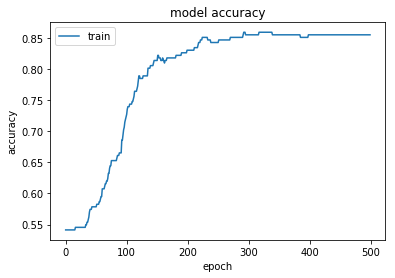

In [24]:
plt.plot(output.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy.png',dpi=100)
plt.show()


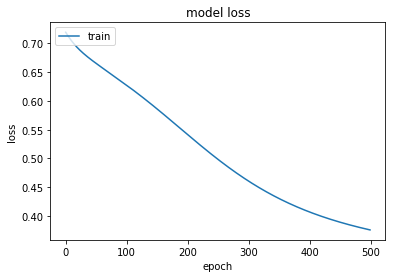

In [25]:
plt.plot(output.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss.png',dpi=100)
plt.show()